In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [2]:
dataPath = r"data\xAPI-Edu-Data.csv"
data = pd.read_csv(dataPath)

In [3]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [5]:
melt = pd.melt(data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView', 'Discussion'])

In [6]:
melt

,Class,variable,value
0,M,raisedhands,15
1,M,raisedhands,20
2,L,raisedhands,10
3,L,raisedhands,30
4,M,raisedhands,40
...,...,...,...
1915,L,Discussion,8
1916,M,Discussion,28
1917,M,Discussion,29
1918,L,Discussion,57


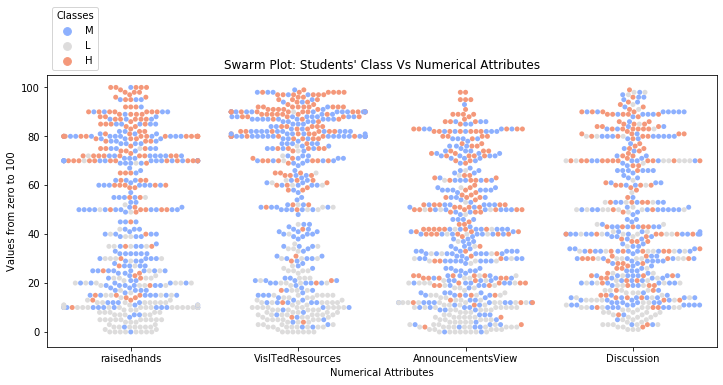

In [7]:
plt.figure(figsize=(12,5))
#sns.color_palette("Set1")
sns.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette= 'coolwarm')
plt.ylabel('Values from zero to 100')
plt.xlabel('Numerical Attributes')
plt.title('Swarm Plot: Students\''' Class Vs Numerical Attributes')
plt.legend(title= 'Classes', loc='lower left', bbox_to_anchor=(0, 1))

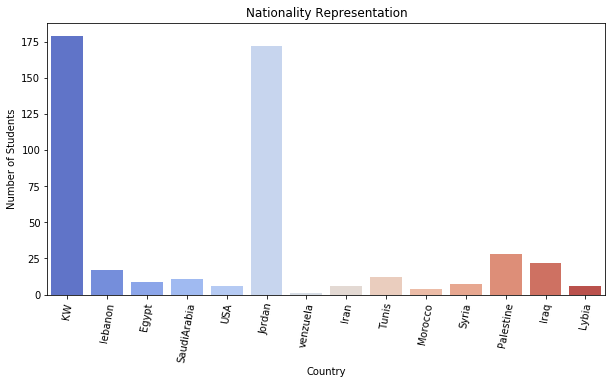

In [8]:
plt.figure(figsize=(10,5))

nat = sns.countplot(x='NationalITy', data=data, palette='coolwarm')
nat.set(xlabel='Country', ylabel='Number of Students', title='Nationality Representation')
plt.setp(nat.get_xticklabels(), rotation=80)
plt.show()               

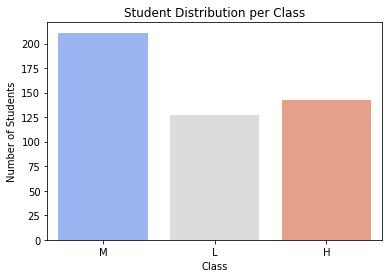

In [9]:
counts = sns.countplot(x='Class', data=data, palette='coolwarm')
counts.set(xlabel='Class', ylabel='Number of Students', title='Student Distribution per Class')
plt.show()

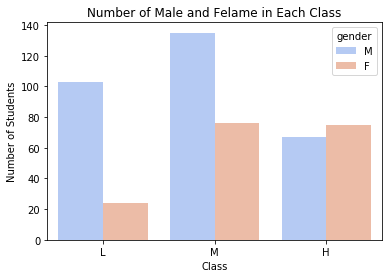

In [10]:
plot = sns.countplot(x='Class', hue='gender', data=data, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Number of Students', title='Number of Male and Felame in Each Class')
plt.show()

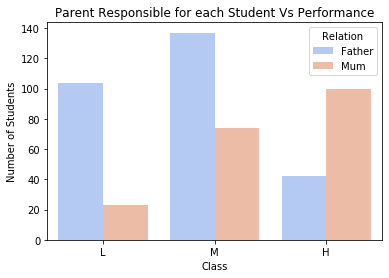

In [11]:
plot = sns.countplot(x='Class', hue='Relation', data=data, order=['L', 'M', 'H'], palette='coolwarm')
plot.set(xlabel='Class', ylabel='Number of Students', title='Parent Responsible for each Student Vs Performance')
plt.show()

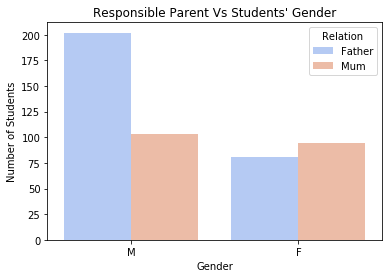

In [12]:

plot = sns.countplot(x='gender', hue='Relation', data=data, order=['M','F'], palette='coolwarm')
plot.set(xlabel='Gender', ylabel='Number of Students', title='Responsible Parent Vs Students\''' Gender')
plt.show()



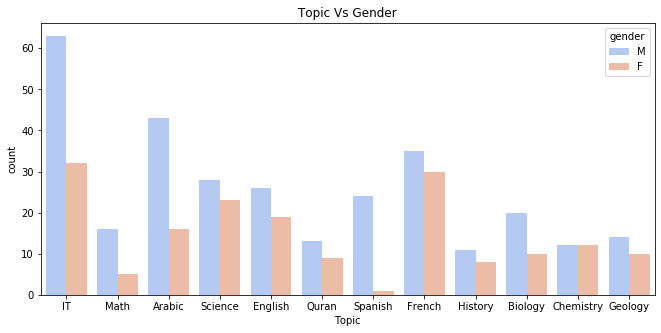

In [13]:
plt.figure(figsize=(11,5))
plot = sns.countplot(x='Topic', hue='gender', data=data, palette='coolwarm' )
plot.set(title = 'Topic Vs Gender')
plt.show()

[Text(0.5, 0, 'Country'), Text(0.5, 1.0, 'Nationality Vs Gender')]

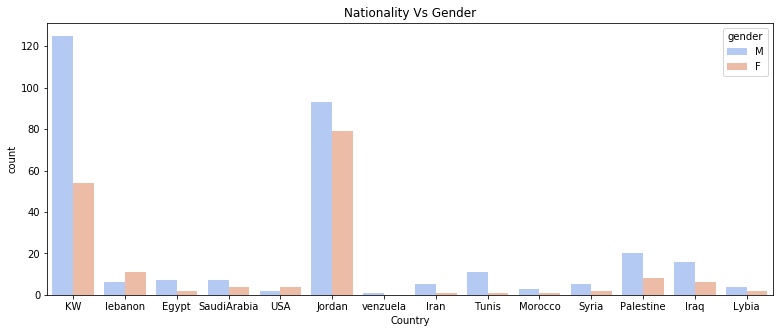

In [14]:
plt.figure(figsize=(13,5))
plot  = sns.countplot(x='NationalITy', hue='gender', data=data, palette='coolwarm')
plot.set(xlabel = 'Country',title = 'Nationality Vs Gender')

Text(0.5, 1.0, 'Discussions of each Class')

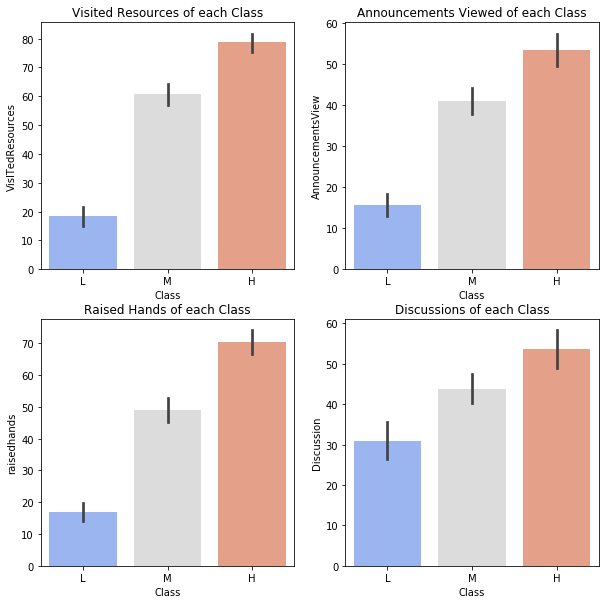

In [15]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))

sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0], palette='coolwarm').set_title('Visited Resources of each Class')
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1], palette='coolwarm').set_title('Announcements Viewed of each Class')
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0], palette='coolwarm').set_title( 'Raised Hands of each Class')
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1], palette='coolwarm').set_title('Discussions of each Class')

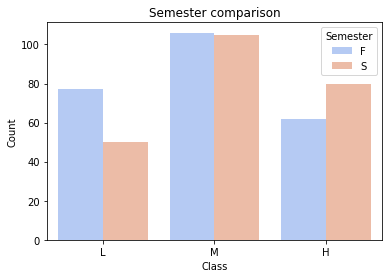

In [16]:
sem = sns.countplot(x='Class', hue='Semester', order=['L', 'M', 'H'], data=data, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Semester comparison')
plt.show()

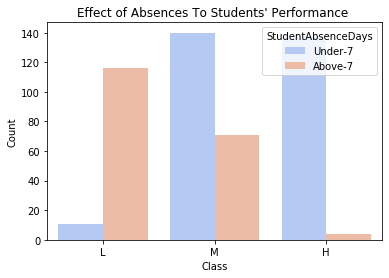

In [17]:
sem = sns.countplot(x='Class', hue='StudentAbsenceDays', order=['L', 'M', 'H'], data=data, palette='coolwarm')
sem.set(xlabel='Class', ylabel='Count', title='Effect of Absences To Students\''' Performance ')
plt.show()

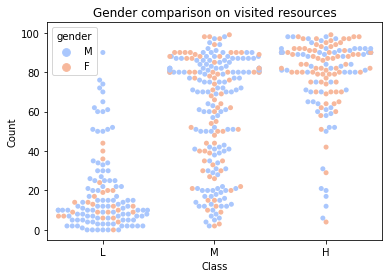

In [18]:
plot = sns.swarmplot(x='Class', y='VisITedResources', hue='gender', order=['L', 'M', 'H'], 
              data=data, palette='coolwarm')
plot.set(xlabel='Class', ylabel='Count', title='Gender comparison on visited resources')
plt.rcParams['figure.figsize']=(10,5)
plt.show()

Text(0.5, 1.0, 'Discussion per Semester')

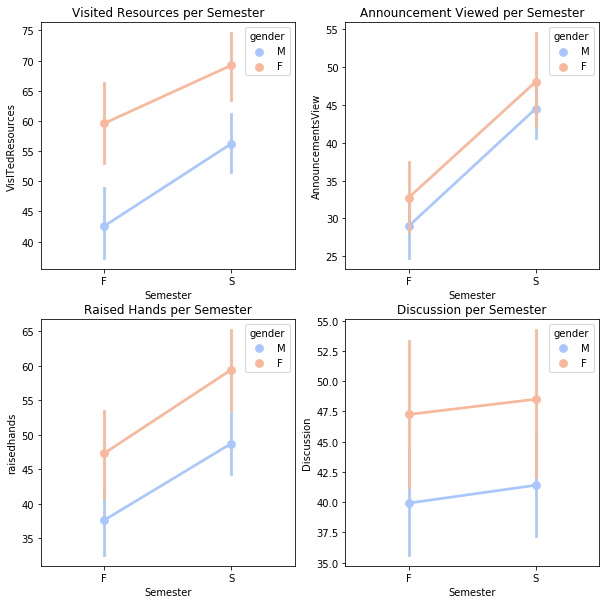

In [19]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))

sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axarr[0,0], palette='coolwarm').set_title('Visited Resources per Semester')
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axarr[0,1], palette='coolwarm').set_title('Announcement Viewed per Semester')
sns.pointplot(x='Semester', y='raisedhands', hue='gender', data=data, ax=axarr[1,0], palette='coolwarm').set_title('Raised Hands per Semester')
sns.pointplot(x='Semester', y='Discussion', hue='gender', data=data, ax=axarr[1,1], palette='coolwarm').set_title('Discussion per Semester')

In [20]:
#gender encoding
Features = data.drop('gender',axis=1)
Target = data['gender']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#Semester encoding
Features = data.drop('Semester',axis=1)
Target = data['Semester']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#ParentAnsweringSurvey Encoding
Features = data.drop('ParentAnsweringSurvey',axis=1)
Target = data['ParentAnsweringSurvey']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#Relation Encoding
Features = data.drop('Relation',axis=1)
Target = data['Relation']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#ParentschoolSatisfaction Encoding
Features = data.drop('ParentschoolSatisfaction',axis=1)
Target = data['ParentschoolSatisfaction']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


#StudentAbsenceDays Encoding
Features = data.drop('StudentAbsenceDays',axis=1)
Target = data['StudentAbsenceDays']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#raisedhands Encoding
Features = data.drop('raisedhands',axis=1)
Target = data['raisedhands']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#VisITedResources Encoding
Features = data.drop('VisITedResources',axis=1)
Target = data['VisITedResources']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#AnnouncementsView Encoding
Features = data.drop('AnnouncementsView',axis=1)
Target = data['AnnouncementsView']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

#Discussion Encoding
Features = data.drop('Discussion',axis=1)
Target = data['Discussion']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])


#Class Encoding
Features = data.drop('Class',axis=1)
Target = data['Class']
label = LabelEncoder()
Cat_Colums = Features.dtypes.pipe(lambda Features: Features[Features=='object']).index
for col in Cat_Colums:
    Features[col] = label.fit_transform(Features[col])

In [21]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(Features, Target, test_size=0.2, random_state=52)

In [22]:
#Logistic Regression
Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=300, random_state=52)}
for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)


Results for: Logistic Regression

[[26  1  8]
 [ 0 20  2]
 [ 4  5 30]]
              precision    recall  f1-score   support

           H       0.87      0.74      0.80        35
           L       0.77      0.91      0.83        22
           M       0.75      0.77      0.76        39

    accuracy                           0.79        96
   macro avg       0.80      0.81      0.80        96
weighted avg       0.80      0.79      0.79        96

accuracy is 0.7916666666666666



Results for: Decision Tree

[[23  0 12]
 [ 0 20  2]
 [ 4  5 30]]
              precision    recall  f1-score   support

           H       0.85      0.66      0.74        35
           L       0.80      0.91      0.85        22
           M       0.68      0.77      0.72        39

    accuracy                           0.76        96
   macro avg       0.78      0.78      0.77        96
weighted avg       0.77      0.76      0.76        96

accuracy is 0.7604166666666666



Results for: Random Forest

[[27  

In [51]:
cols = data.columns.tolist()
X = data.drop('Class', axis=1)
y = data['Class']
labels = y.unique()

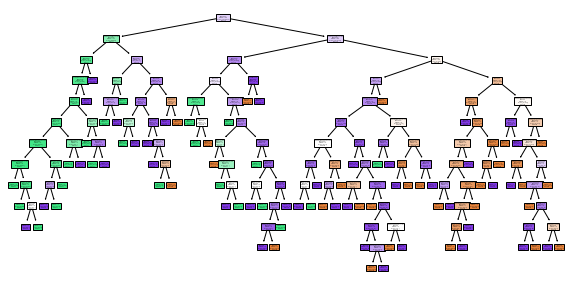

In [52]:
decisionTree = models['Decision Tree']
plot_tree(decisionTree, filled=True, feature_names = cols, class_names = labels)
plt.show()

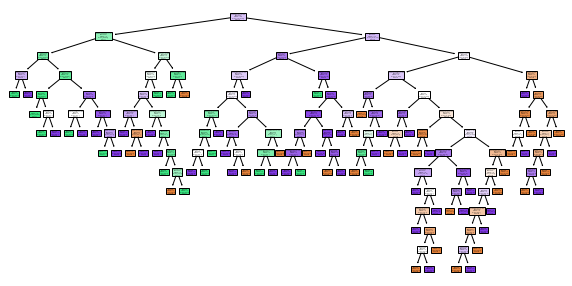

In [53]:
rfs = models['Random Forest']
plot_tree(rfs.estimators_[0], filled=True, feature_names = cols, class_names = labels)
plt.show()

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

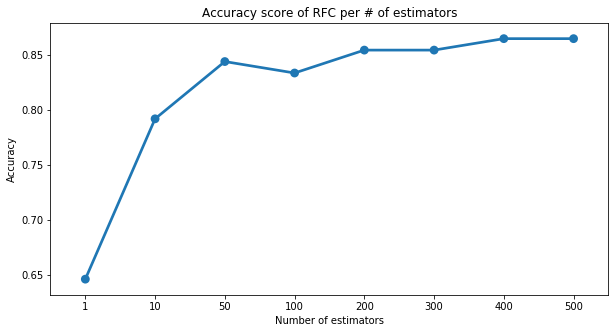

In [55]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=52)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

In [56]:
X.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays'],
      dtype='object')

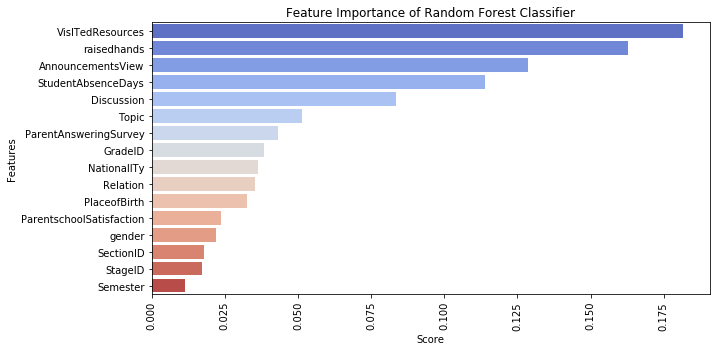

In [57]:
rfc = RandomForestClassifier(n_estimators=200, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

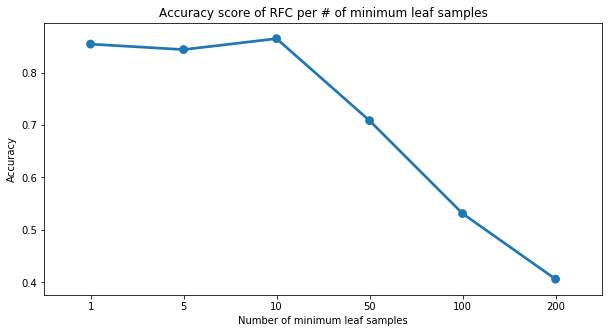

In [58]:
# Exploring minimum leaf samples
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=200, random_state=52, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()

In [78]:
from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(max_depth=10, learning_rate=0.1, n_estimators=100,seed=10)
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print("XGBoost Accuracy: {0:.2f}%".format(accuracy*100))

XGBoost Accuracy: 84.38%


In [60]:
print (classification_report(y_test,xgb_pred))

precision    recall  f1-score   support

           H       0.88      0.80      0.84        35
           L       0.85      1.00      0.92        22
           M       0.82      0.79      0.81        39

    accuracy                           0.84        96
   macro avg       0.85      0.86      0.85        96
weighted avg       0.84      0.84      0.84        96



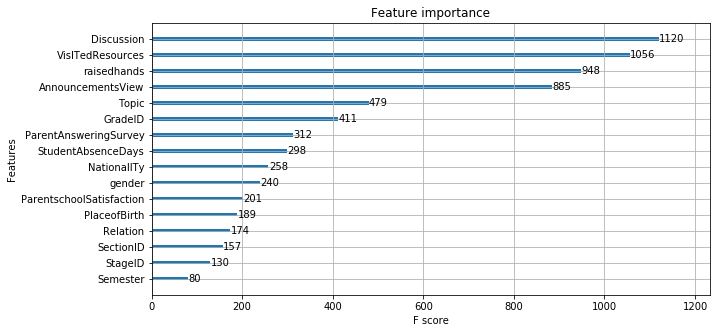

In [79]:
plot_importance(xgb)

In [62]:
xgb.feature_importances_

array([0.03440873, 0.03336895, 0.05062202, 0.03474279, 0.03801956,
       0.03088437, 0.03873136, 0.02134486, 0.07489616, 0.04999976,
       0.12665406, 0.05148215, 0.03990091, 0.04433041, 0.03050874,
       0.30010518], dtype=float32)

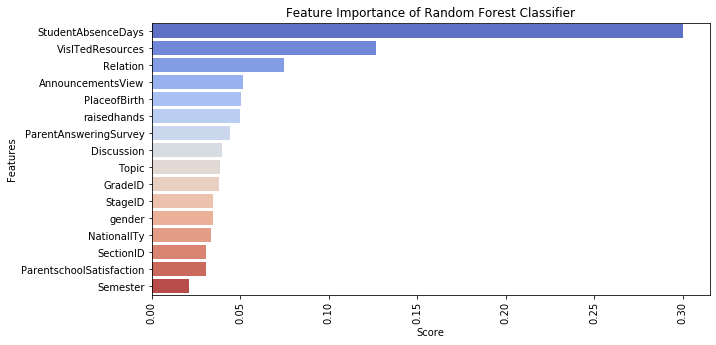

In [63]:
dn = {'features':X.columns, 'score':xgb.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h', palette='coolwarm')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()